In [1]:
import pmdarima
import pytz
import pandas as pd
import sm as sm
from pandas import DataFrame

dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
df = pd.read_csv('../doge_v1.csv', parse_dates=['Date'], date_parser=dateparse)
df.set_index(["Date"], drop=False, inplace=True)
df.head()

C:\Users\Predrag\AppData\Local\Temp\ipykernel_2504\2466626714.py:7: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')


,Date,Open,High,Low,Close,Adj Close,Volume,twitter_followers,reddit_average_posts_48h,reddit_average_comments_48h,...,subscribers,total_issues,closed_issues,pull_requests_merged,pull_request_contributors,commit_count_4_weeks,dogecoin_unscaled,dogecoin_monthly,scale,dogecoin
Date,,,,,,,,,,,,,,,,,,,,,
2017-11-09,2017-11-09,0.001207,0.001415,0.001181,0.001415,0.001415,6259550,165257.000000,0.633,9.490,...,225.0,395.000000,336.0,732.0,67.0,0.0,57,1.0,0.01,0.57
2017-11-10,2017-11-10,0.001421,0.001431,0.001125,0.001163,0.001163,4246520,165308.000000,0.833,11.958,...,225.0,395.166667,336.0,732.0,67.0,0.0,24,1.0,0.01,0.24
2017-11-11,2017-11-11,0.001146,0.001257,0.001141,0.001201,0.001201,2231080,165363.000000,0.980,13.224,...,225.0,395.333333,336.0,732.0,67.0,0.0,23,1.0,0.01,0.23
2017-11-12,2017-11-12,0.001189,0.001210,0.001002,0.001038,0.001038,3288960,165402.000000,1.102,14.469,...,225.0,395.500000,336.0,732.0,67.0,0.0,23,1.0,0.01,0.23
2017-11-13,2017-11-13,0.001046,0.001212,0.001019,0.001211,0.001211,2481270,165452.666667,1.277,15.383,...,225.0,395.666667,336.0,732.0,67.0,0.0,41,1.0,0.01,0.41


In [2]:
print(pd.date_range(
  start="2017-11-09", end="2022-02-04").difference(df.index))

DatetimeIndex([], dtype='datetime64[ns]', freq='D')


<AxesSubplot:xlabel='Date'>

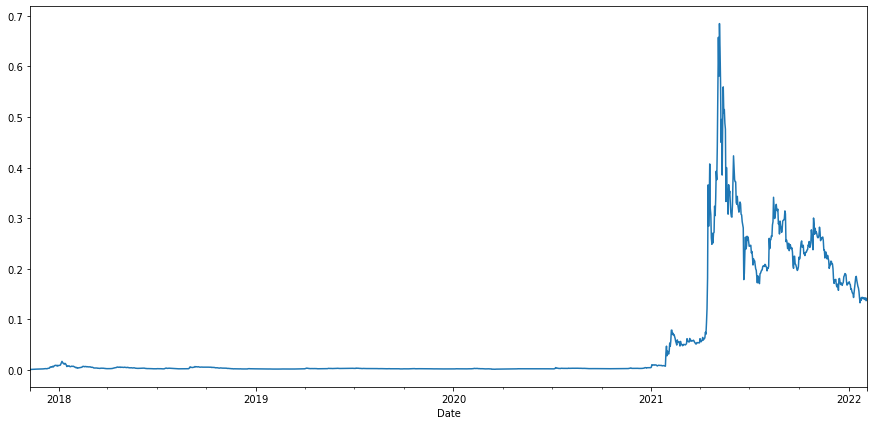

In [3]:
import matplotlib.pyplot as plt
df['Close'].plot(figsize=(15, 7))

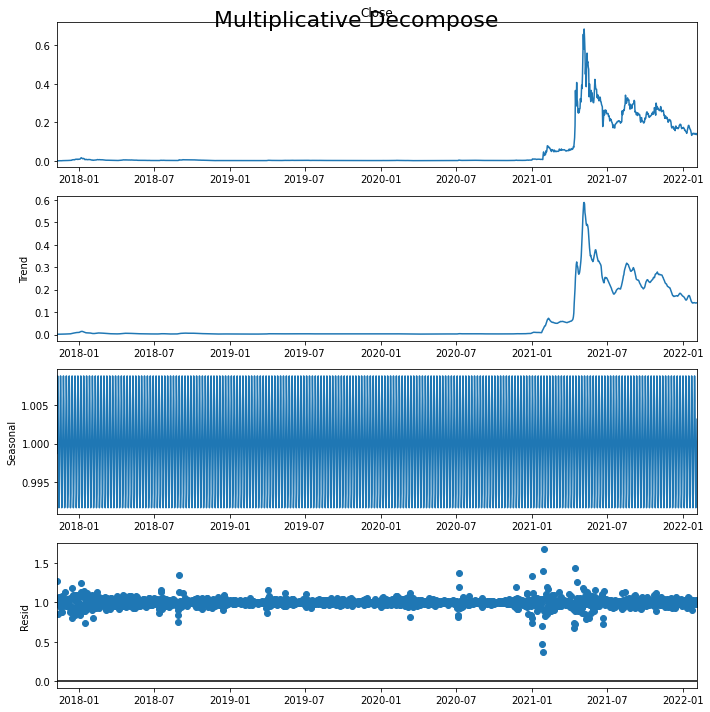

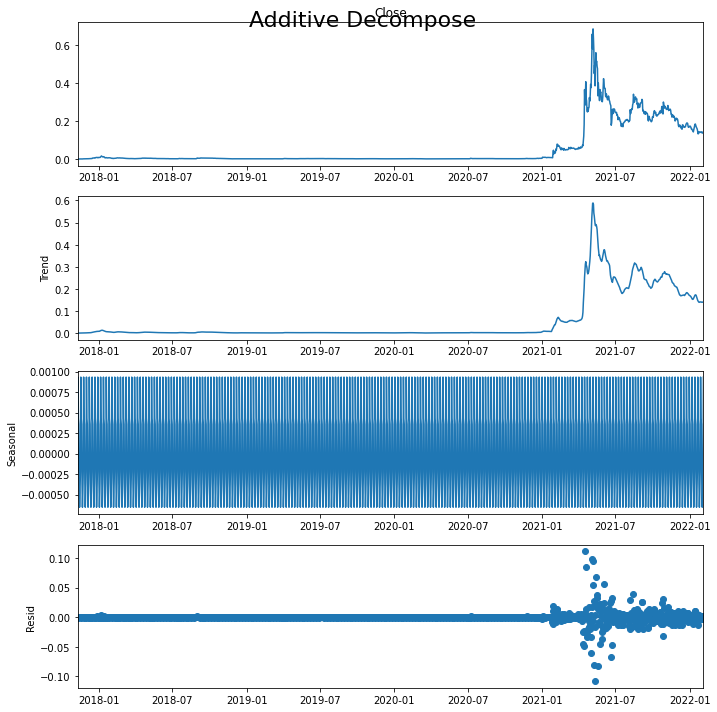

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse


# Multiplicative Decomposition
result_mul = seasonal_decompose(df['Close'], model='multiplicative', extrapolate_trend='freq')

# Additive Decomposition
result_add = seasonal_decompose(df['Close'], model='additive', extrapolate_trend='freq')

# Plot
plt.rcParams.update({'figure.figsize': (10,10)})
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

In [5]:
from python_scripts.time_series_utilities import check_stationarity, plot_pacf_acf

check_stationarity(df, 'Close')

ADF Statistic: -1.9981536400975362
p-value: 0.2873832500050448
Critial Values:
   1%, -3.4346481290263013
Critial Values:
   5%, -2.8634383565975736
Critial Values:
   10%, -2.567780658251872

KPSS Statistic: 2.901585
p-value: 0.010000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


c:\users\predrag\desktop\siap\projectsiap2021\venv\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


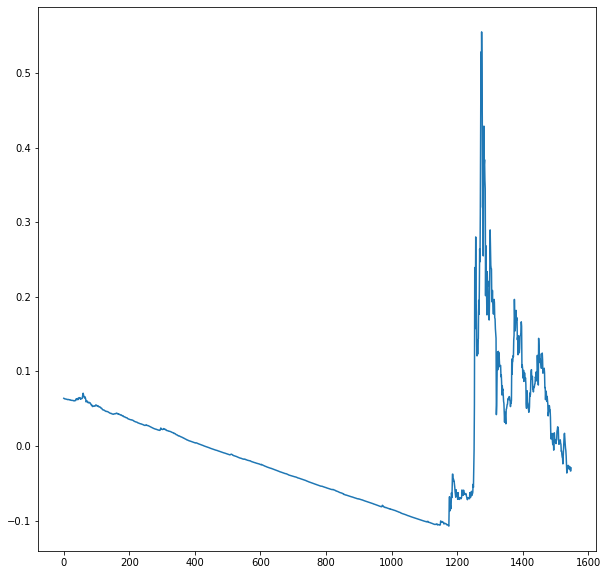

In [6]:
from scipy import signal
detrended = signal.detrend(df['Close'].values)
plt.plot(detrended)

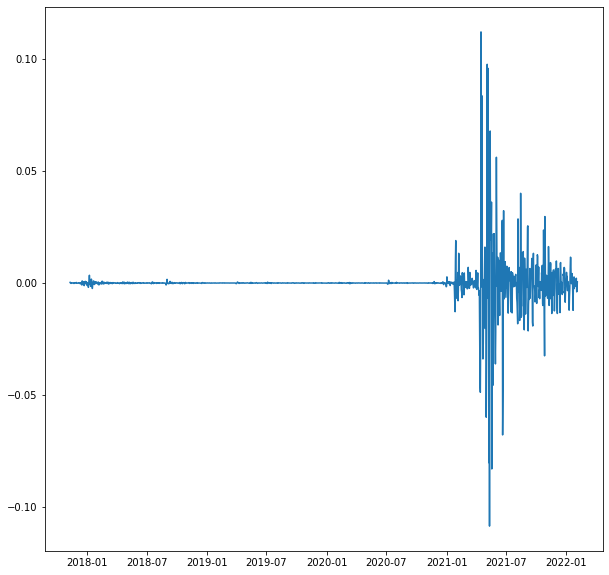

In [7]:
result_mul = seasonal_decompose(df['Close'], model='multiplicative', extrapolate_trend='freq')
detrended_mul = df['Close'].values - result_mul.trend
plt.plot(detrended_mul)

<AxesSubplot:xlabel='Date'>

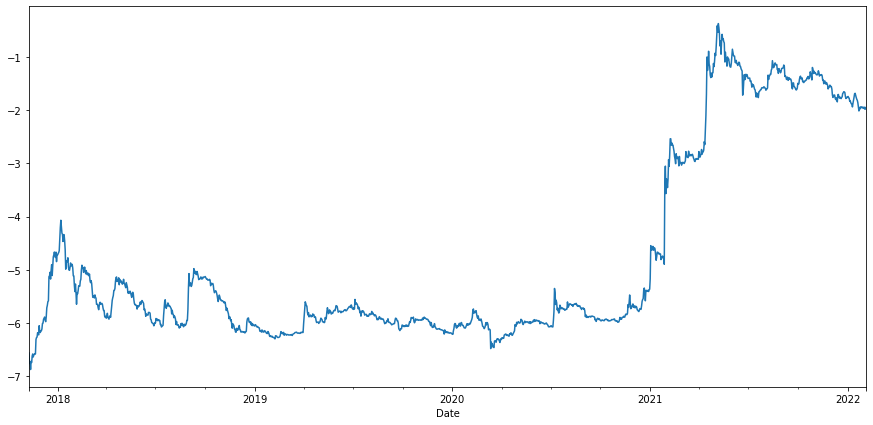

In [8]:
import numpy as np

df['transformed_Close'] = np.log(df['Close'])
df['transformed_Close'].plot(figsize=(15, 7))


In [9]:
check_stationarity(df, 'transformed_Close')

ADF Statistic: -0.6937305337810807
p-value: 0.8483667942515267
Critial Values:
   1%, -3.4345896103572207
Critial Values:
   5%, -2.8634125289495747
Critial Values:
   10%, -2.5677669049339658

KPSS Statistic: 3.458383
p-value: 0.010000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


c:\users\predrag\desktop\siap\projectsiap2021\venv\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [10]:
df['transformed_Close'] = df.transformed_Close.diff()

<AxesSubplot:xlabel='Date'>

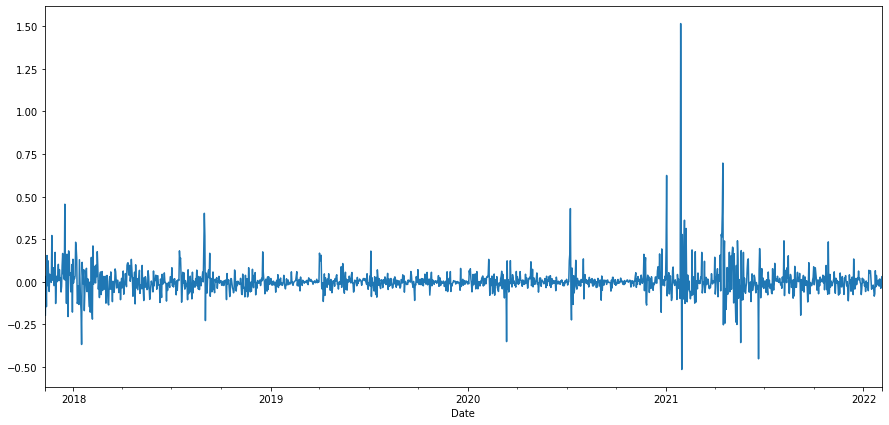

In [11]:
df_transformed = df.iloc[1:, :]
df['transformed_Close'].plot(figsize=(15, 7))

In [12]:
check_stationarity(df_transformed, 'transformed_Close')



ADF Statistic: -20.718625878919664
p-value: 0.0
Critial Values:
   1%, -3.4345896103572207
Critial Values:
   5%, -2.8634125289495747
Critial Values:
   10%, -2.5677669049339658

KPSS Statistic: 0.181701
p-value: 0.100000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


c:\users\predrag\desktop\siap\projectsiap2021\venv\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


c:\users\predrag\desktop\siap\projectsiap2021\venv\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


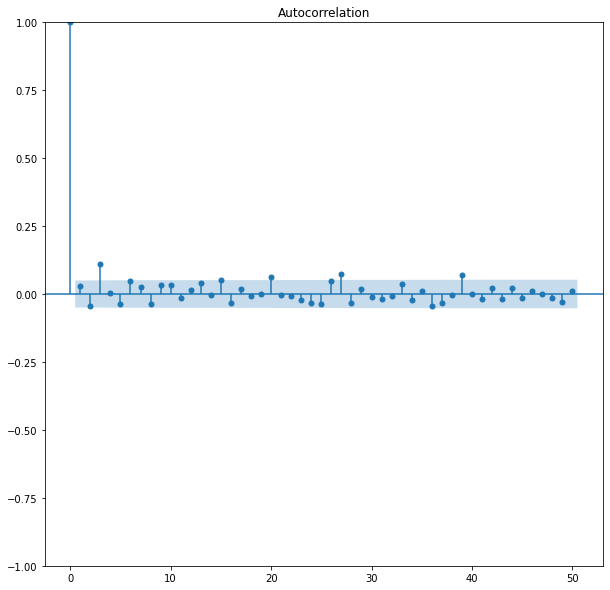

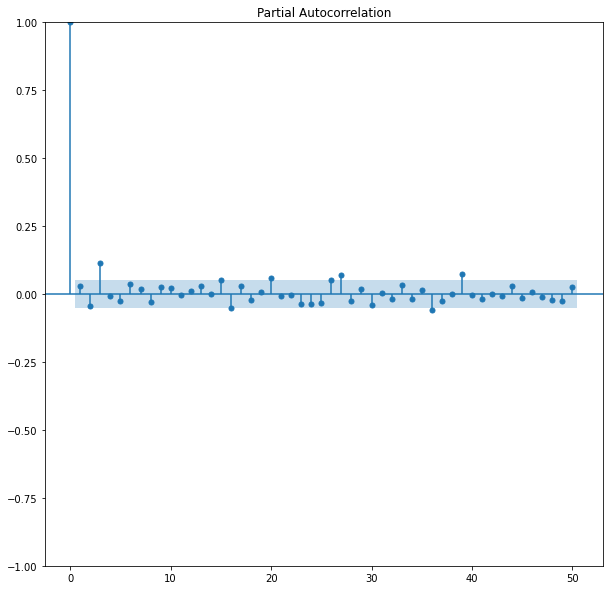

In [13]:
plot_pacf_acf(df_transformed, 'transformed_Close')

In [14]:
import statsmodels.api as sm
sm.stats.acorr_ljungbox(df_transformed.transformed_Close, lags=[30], return_df=True)

,lb_stat,lb_pvalue
30,70.1811,0.000046


In [15]:

from pmdarima import auto_arima
import urllib3
arima_model = pmdarima.auto_arima(df_transformed.transformed_Close,
                                  start_p = 0,
                                  start_q= 0,
                                  d=None,
                                  max_p=27,
                                  max_q=27,
                                  test='adf',
                                  seasonal=False,
                                  trace=True,
                                  error_action='ignore',
                                  stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-3337.890, Time=0.39 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-3337.223, Time=0.69 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-3337.364, Time=0.44 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-3344.772, Time=1.82 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-3345.138, Time=1.82 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-3338.276, Time=0.87 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=-3355.204, Time=1.85 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=-3357.164, Time=1.16 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=-3355.238, Time=1.37 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=-3353.226, Time=2.24 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-3356.794, Time=5.65 sec

Best model:  ARIMA(3,0,0)(0,0,0)[0]          
Total fit time: 18.355 seconds


In [16]:
sm.stats.acorr_ljungbox(arima_model.resid(), lags=[30], return_df=True)

,lb_stat,lb_pvalue
30,46.755228,0.026287


In [17]:
arima_model = pmdarima.auto_arima(df_transformed.transformed_Close,
                                  start_p = 3,
                                  start_q= 3,
                                  d=None,
                                  max_p=27,
                                  max_q=27,
                                  test='adf',
                                  seasonal=False,
                                  trace=True,
                                  error_action='ignore',
                                  stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=-3356.467, Time=5.59 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-3337.890, Time=0.38 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-3337.223, Time=0.64 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-3337.364, Time=0.47 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=-3357.244, Time=3.30 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=-3352.942, Time=0.90 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-3353.633, Time=4.18 sec
 ARIMA(2,0,4)(0,0,0)[0]             : AIC=-3355.551, Time=4.86 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-3344.566, Time=1.76 sec
 ARIMA(1,0,4)(0,0,0)[0]             : AIC=-3351.517, Time=1.32 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=-3357.605, Time=3.98 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=-3355.204, Time=1.57 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=-3355.799, Time=4.91 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-3345.138, Time=1.64 sec
 ARIMA(4,0,1)(0,0,0

In [18]:
sm.stats.acorr_ljungbox(arima_model.resid(), lags=[30], return_df=True)

,lb_stat,lb_pvalue
30,39.935754,0.106115


In [19]:
from python_scripts.sarima_helper import train_test_split_continual

train,test = train_test_split_continual(df, 0.1)
model = sm.tsa.arima.ARIMA(np.log(train.Close), order=(3,1,2))
fitted_model = model.fit()
forecast = fitted_model.get_forecast(len(test))

c:\users\predrag\desktop\siap\projectsiap2021\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\users\predrag\desktop\siap\projectsiap2021\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\users\predrag\desktop\siap\projectsiap2021\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [20]:
sum_frame = (forecast.summary_frame())


<AxesSubplot:>

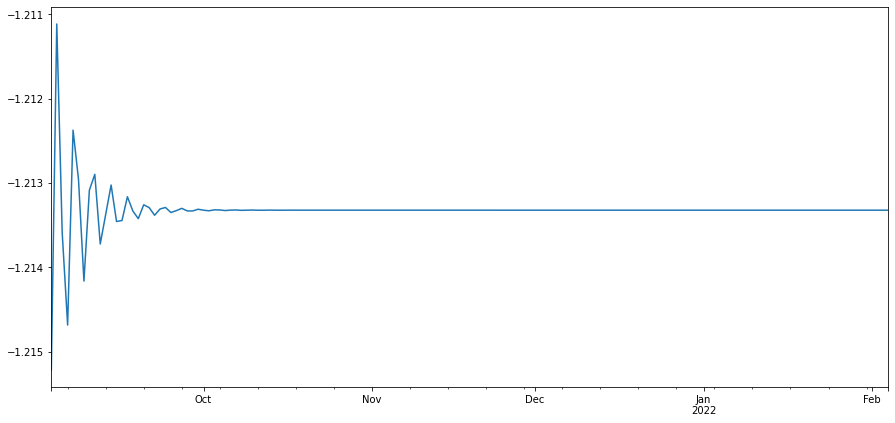

In [21]:
sum_frame['mean'].plot(figsize=(15, 7))

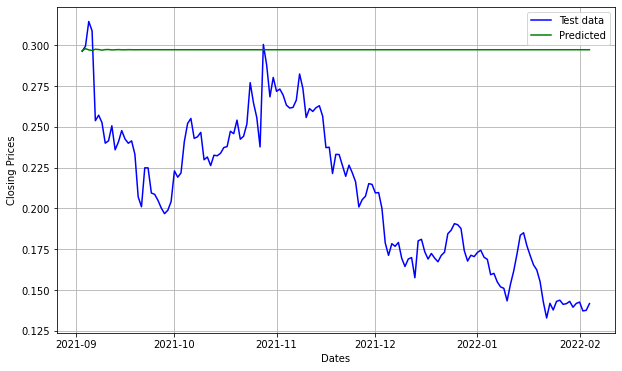

In [22]:
plt.figure(figsize=(10, 6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(test.Close, 'blue', label='Test data')
plt.plot(np.exp(sum_frame['mean']), 'green', label='Predicted')
plt.legend()
plt.show()

c:\users\predrag\desktop\siap\projectsiap2021\venv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\predrag\desktop\siap\projectsiap2021\venv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\predrag\desktop\siap\projectsiap2021\venv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\predrag\desktop\siap\projectsiap2021\venv\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed t

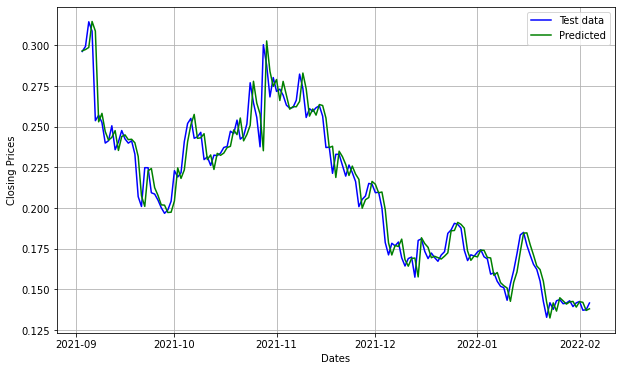

Test MAPE: 3.361


In [23]:
from python_scripts.time_series_utilities import test_arima_one_step

predictions = test_arima_one_step(train, test, 3,1,2)

In [ ]:
from python_scripts.time_series_utilities import grid_search_hyperparams

p_s = range(0,10)
q_s = range(0,10)
d_s = [1]

grid_search_hyperparams(p_s, q_s, d_s, train, test)

In [ ]:
test_arima_one_step(train, test, 1,1,0)